# **1. Introduction** 

## **Background**

Bangkok, ibu kota Thailand, merupakan salah satu destinasi wisata paling populer di dunia. Kota ini menawarkan perpaduan unik antara budaya tradisional dan modernitas, yang menarik wisatawan dari berbagai belahan dunia. Dengan meningkatnya jumlah wisatawan setiap tahun, pasar akomodasi di Bangkok, termasuk platform Airbnb, mengalami pertumbuhan yang signifikan.

Airbnb telah menjadi pilihan akomodasi yang populer di kalangan wisatawan karena fleksibilitas dan keragaman pilihan yang ditawarkan. Namun, dengan begitu banyaknya listing yang tersedia, terdapat tantangan bagi tuan rumah dan penyewa untuk menentukan lokasi yang paling strategis. Memahami lokasi-lokasi yang paling populer di Bangkok dapat memberikan wawasan penting bagi para pemilik properti untuk memaksimalkan okupansi dan pendapatan, serta bagi calon penyewa untuk menemukan tempat tinggal yang sesuai dengan preferensi mereka.

## **1.1 Business Problem**


## **Problem Statement**

Dengan semakin banyaknya pilihan akomodasi di Bangkok yang tersedia di platform Airbnb, ada kebutuhan untuk memahami faktor-faktor yang mempengaruhi `price`,`room_type`, dan `number_of_reviews` yang diterima oleh masing-masing listing. Penelitian ini bertujuan untuk menjawab beberapa pertanyaan penting:

1. Apa saja faktor utama yang mempengaruhi `price` dari listing Airbnb di Bangkok?
2. Bagaimana `neighbourhood` dan `room_type` mempengaruhi tingkat hunian ?
3. Apakah ada hubungan antara `number_of_reviews` dengan `price` atau `room_type`?
4. Bagaimana pola `availability_365` dan `Term` mempengaruhi performa listing?


## **Data:**

**Dataset ini berisi informasi terkait lokasi, tipe kamar, host, harga, minimal jumlah hari yang disewa, ketersediaan, dan review yang didapat oleh listing**

1. Unnamed : index
2. id: ID unik untuk setiap listing.
3. name: Nama listing.
4. host_id: ID unik untuk setiap host.
5. host_name: Nama host.
6. neighbourhood: Lokasi atau wilayah listing.
7. latitude dan longitude: Koordinat geografis dari listing.
8. room_type: Tipe ruangan yang tersedia (misalnya "Entire home/apt", "Private room").
9. price: Harga per malam.
10. minimum_nights: Jumlah minimum malam untuk menginap.
11. number_of_reviews: Jumlah ulasan yang diterima.
12. last_review: Tanggal ulasan terakhir.
13. reviews_per_month: Rata-rata ulasan per bulan.
14. calculated_host_listings_count: Jumlah listing yang dimiliki oleh host.
15. availability_365: Ketersediaan dalam 365 hari terakhir.
16. number_of_reviews_ltm: Jumlah ulasan dalam 12 bulan terakhir

## **Import Necessary Libraries**

In [281]:
# Import Library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Uji statisik
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import shapiro
from statsmodels.formula.api import ols
from scipy.stats import iqr


# Menghilangkan warning
import warnings
warnings.filterwarnings('ignore')

# **2. Data Preparation**

In [282]:
# Load the dataset
df = pd.read_csv(r"C:\Users\angga\Downloads\Airbnb Listings Bangkok.csv")

# menampilkan 5 baris pertama
df.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


**Dataset ini memiliki 15.854 baris dan 17 kolom. Berikut adalah beberapa kolom penting yang terdapat dalam dataset:**

1. Unnamed : index
2. id: ID unik untuk setiap listing.
3. name: Nama listing.
4. host_id: ID unik untuk setiap host.
5. host_name: Nama host.
6. neighbourhood: Lokasi atau wilayah listing.
7. latitude dan longitude: Koordinat geografis dari listing.
8. room_type: Tipe ruangan yang tersedia (misalnya "Entire home/apt", "Private room").
9. price: Harga per malam.
10. minimum_nights: Jumlah minimum malam untuk menginap.
11. number_of_reviews: Jumlah ulasan yang diterima.
12. last_review: Tanggal ulasan terakhir.
13. reviews_per_month: Rata-rata ulasan per bulan.
14. calculated_host_listings_count: Jumlah listing yang dimiliki oleh host.
15. availability_365: Ketersediaan dalam 365 hari terakhir.
16. number_of_reviews_ltm: Jumlah ulasan dalam 12 bulan terakhir.

## **2.1. Data Understanding**

Data Understanding pada dataset ini merujuk pada proses eksplorasi dan pemahaman awal terhadap data yang Anda miliki. Tujuan utamanya adalah untuk mengenali struktur, kualitas, dan karakteristik data sehingga Anda dapat menentukan langkah-langkah analisis atau model yang tepat. Berikut adalah beberapa aspek yang dicakup dalam Data Understanding untuk dataset Airbnb Bangkok.

In [283]:
# melihat informasi dari data, berupa nama kolom, tipe data dan null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

**Missing Values**

In [284]:
# Menghitung jumlah missing values di setiap kolom
df.isna().sum()

Unnamed: 0                        0   
id                                0   
name                              8   
host_id                           0   
host_name                         1   
neighbourhood                     0   
latitude                          0   
longitude                         0   
room_type                         0   
price                             0   
minimum_nights                    0   
number_of_reviews                 0   
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count    0   
availability_365                  0   
number_of_reviews_ltm             0   
dtype: int64

In [285]:
# Membuat tabel missing values untuk melihat persentase missing values pada setiap kolom
missing_values_table = df.isna().sum().reset_index()
missing_values_table.columns = ['Column', 'Missing Values']
missing_values_table['% Missing'] = (missing_values_table['Missing Values'] / df.shape[0]) * 100

# Menampilkan tabel missing values
missing_values_table = missing_values_table[missing_values_table['Missing Values'] > 0]
missing_values_table

,Column,Missing Values,% Missing
2,name,8,0.050460
4,host_name,1,0.006308
12,last_review,5790,36.520752
13,reviews_per_month,5790,36.520752


In [286]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

Unnamed: 0                        0.000000 
id                                0.000000 
name                              0.050460 
host_id                           0.000000 
host_name                         0.006308 
neighbourhood                     0.000000 
latitude                          0.000000 
longitude                         0.000000 
room_type                         0.000000 
price                             0.000000 
minimum_nights                    0.000000 
number_of_reviews                 0.000000 
last_review                       36.520752
reviews_per_month                 36.520752
calculated_host_listings_count    0.000000 
availability_365                  0.000000 
number_of_reviews_ltm             0.000000 
dtype: float64

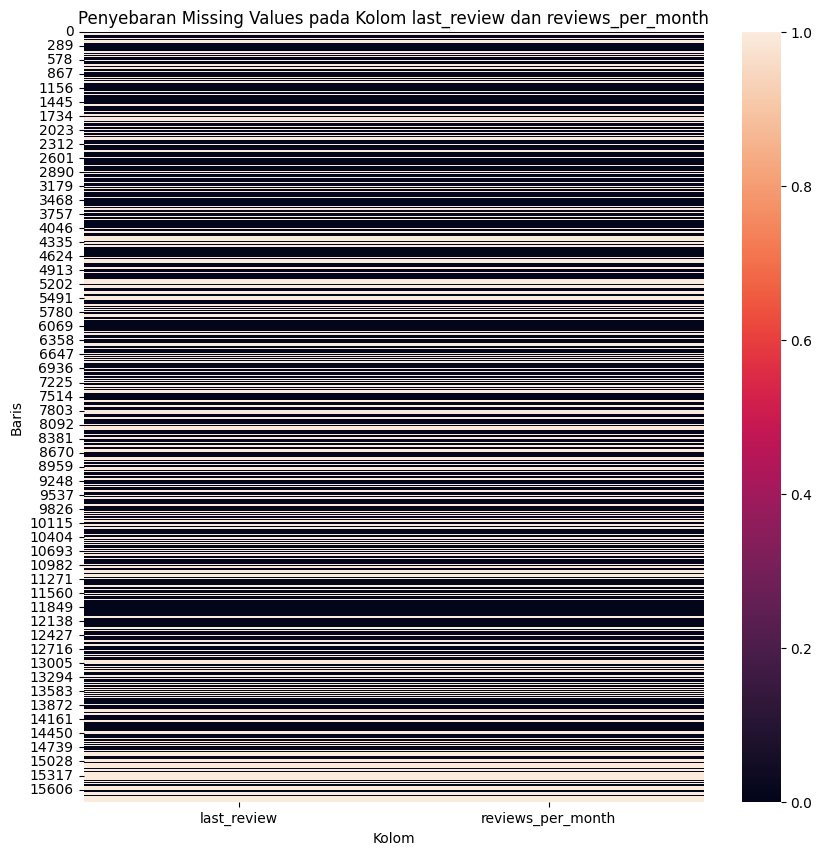

In [287]:
# Membuat visualisasi penyebaran missing values 'last_review','reviews_per_month'.
plt.figure(figsize=(10,10))
sns.heatmap(df[['last_review','reviews_per_month']].isna())
plt.title('Penyebaran Missing Values pada Kolom last_review dan reviews_per_month')
plt.xlabel('Kolom')
plt.ylabel('Baris')
plt.show()

**Secara garis besar :**

- *missing value* di kolom *last_review* dan *reviews_per_month* memiliki proporsi yang cukup tinggi (>10%), dengan missing value di kolom *last_review* dan *reviews_per_month* mencapai 36.52%.
- Missing values pada last_review dan reviews_per_month dapat menghambat analisis terkait performa listing dari sisi ulasan dan aktivitas.

**Solusi yang Mungkin Dilakukan:**

- Ada beberapa metode yang bisa digunakan untuk mengisi missing value, cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli. Dalam kasus ini, kita akan mencoba mengisi *missing value* berdasarkan kolom lain yang secara domain knowledge atau secara statistik berkaitan dengan kolom yang memiliki *missing value*. Jika masih ada kolom yang tidak bisa diisi, barulah kita mengisi dengan angka *mean, median* atau *modus*. Menghapus data akan menjadi opsi terakhir.
- Isi missing values dengan nilai default (misalnya 0 untuk reviews_per_month jika tidak ada ulasan).
- Jika analisis Anda tidak memerlukan data ulasan, Anda bisa menghapus baris dengan missing values di kedua kolom ini.

In [288]:
# Definisikan format missing values yang mungkin ada
missing_values_format = ['N.A','na','n.a','n/a','Nan','nan','?','-']

# tambahakan parameter na_values untuk memformat missing values
df_missing_values = pd.read_csv(r"C:\Users\angga\Downloads\Airbnb Listings Bangkok.csv", na_values= missing_values_format)
df_missing_values

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


In [289]:
# mengecek baris dan kolom
df.shape

(15854, 17)

In [290]:
# Mengecek data duplicate
df.duplicated().sum()

0

In [291]:
# melihat deskripsi statistik sederhana dari dataset
df.describe()

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.000000,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,7926.500000,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,4576.799919,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3963.250000,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,7926.500000,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,11889.750000,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,15853.000000,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


- Harga (price): Rata-rata harga per malam adalah 3.217,70 THB, dengan variasi yang cukup besar (standar deviasi 24.972,12 THB). Harga terendah adalah 0 THB dan yang tertinggi mencapai 1.100.000 THB.
- Minimum Nights: Rata-rata minimum malam menginap adalah 15,29 malam, dengan beberapa listing yang memiliki minimum 1125 malam.
- Number of Reviews: Rata-rata jumlah ulasan per listing adalah 16,65 ulasan, dengan jumlah ulasan terbanyak mencapai 1224.
- Reviews per Month: Rata-rata ulasan per bulan adalah 0,81 ulasan.
- Calculated Host Listings Count: Rata-rata jumlah listing yang dimiliki oleh satu host adalah 13,89.
- Availability 365: Rata-rata ketersediaan per tahun adalah 244 hari.

In [292]:
# Menganalisis distribusi variabel kategori
df.describe(include=['object'])

,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


In [293]:
# menampilkan nilai unique dari setiap variabel dan menyatukannya ke dalam dataframe

pd.set_option('display.max_colwidth', 1)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])
Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
Desc

,Column Name,Number of Unique,Unique Sample
0,Unnamed: 0,15854,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]"
1,id,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, 48736, 1738669, 1744248, 952677, 55681, 1765918, 55686, 59221, 959254, 62217, 1791481, 66046, 105042, 1793000, 960858, 113744, 965722, 1808600, 118118, 1816517, 969792, 121410, 145343, 973830, 156583, 1823321, 159854, 976690, 978531, 166267, 169285, 978969, 1842066, 169514, 1849029, 1862089, 985743, 988373, 172332, 1016487, 1862331, 1862377, 185364, 1887544, 1888303, 1019241, 241416, 1026451, 1028469, 1028486, 1035589, 1035640, 1897982, 296960, 1898332, 1041976, 313459, 1052180, 1926489, 320014, 1933894, 1057173, 1060320, 384924, 1067748, 1077493, 1943048, 385130, 385278, 385979, 390611, 1947314, 1079039, 1086843, 393066, 397449, 405662, 1088343, 1094136, 1961981, 407381, 1975849, 1133843, 413824, 428360, 428421, 428907, 428950, 430691, 430703, 430706, 432004, 439051, 1138679, ...]"
2,name,14794,"[Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bangkok, Spacious one bedroom at The Kris Condo Bldg. 3, Suite Room 3 at MetroPoint, NEw Pro!! Bungalow Bkk Centre, Condo with Chaopraya River View, 1 chic bedroom apartment in BKK, Batcave, Pool view, near Chatuchak, Standard Room Decor do Hostel, Sathorn Terrace Apartment(61), 2BR apt in a cozy neighborhood, Comfy bedroom near River pier & BTS Taksin., budget hotel bangkok near subway, Deluxe Condo, Nana, Pool/GYM/Sauna, Luxury@swimpool/FreeWiFi/nearJJMkt, Nice and Quiet condo near BTS Onnut, 24Flr- 1br Apt near JJ, MRT, BTS, Central Bangkok 3 Bedroom Apartment, The Duplex - Asoke- Luxury 92sqm, New, Stylish & Luxury Studio Condo, River View - Ivy Condo (1 Bedroom), Siamese Gioia on Sukhumvit 31, Contemporary Modern Duplex-Thong Lo, Pan Dao Condo 5 min from BTS On Nut, 1 BR condominium center BKK +NETFLIX+55SQM, 1 penthouse in central Bangkok, MetroPoint Suite Room, Near Airport, Boutique Rooms Near Bangkok Airport, BangLuang House1 @ Bangkok Thailand, Studio near Chula University/Silom walk to MRT/BTS, กรองทองแมนชั่น (ลาดพร้าว 81), Deluxe one Bedroom Condo w.Pool-GYM & Sauna 8-7, Beautiful 1 BR apartment @BTS Ari, Urban Oasis in the heart of Bangkok, 1Bed apt. near Chula University/Silom, Stay at the ROARING RATCHADA!, 60 m2 apartment in Thong Lor, Bangkok, ICONSIAM River view on 49th floor, 2br apt in Sukhumvit Asoke near BTS, Self catering cozy1-bed near BTS, ❂☀☀☀Perfect Escape☀☀☀Sunny Roof EnSuite☀☀☀☀, Room with city view of BKK, BangLuang House 2@ Bangkok Thailand, Tranquility found in busy Bangkok near new skytran, Private room in Bangkok, ☞✪✪✪✪Roomy Studio 4 Family r friends✪No Stairs✪✪✪✪, ☞Downtown Central Studio-Bangkok MRT, Beautiful Wood Bangkok Resort House, ""Serviced 2 Bed Scenic SkyVillas"", Cozy 1BR rooftop (BTS Ploenchit) heart of bangkok, Chic two bedroom for Monthly rental, Sukhumvit52 near SkyTrain to BkkCBD, ♡Chic Studio, Easy Walk to Pier & BTS Taksin♡, One Bedroom Suite- WIFI- SATHORN, STUDIO RM2 - WIFI- SATHORN, Quiet Double Bed Apartment, Quiet Double Bed Apartment, Suvarnabhumi free transfer, Luxury&Comfy wthWifi walk-distance to Subwy-Malls, Apr. for rent full fur 1 bedroom, monthly, Long-stay special rate spacious entire floor Siam, One Bed Room at Sukumvit 50 Bangkok, City View, relaxed theme & delicious food around, Ideo Blucove Sukhumvit Bangkok, 2-BR condo near BTS on Sukhumvit Rd, NewlyRenovated! 3Br,SingleHouse, Park/BTS/Airport., IdeoMix, Sukhumvit RD, close to BTS, Mix Dorm Decor do Hostel, Oasis in the heart of Bangkok, 5 mins by car from Chong Nonsi BTS Station, Inn Saladaeng - Superior hotel roo

**Secara umum data set yang kita bisa lihat bahwa:**

1. Dataset tersebut terdiri dari `15` kolom dari `15.854` baris.
2. Kolom `host_id`, `host_name` tidak relevan bagi analisis. Maka dari itu, kita perlu menghapus kolom tersebut. 
3. Missing values dalam kolom `host_name` dapat kita hiraukan karena kita akan menghapus kolom itu. Namun untuk missing values dalam kolom `name` dapat kita ganti dengan 'Unknown'.
4. Terdapat baris yang memiliki nilai `price` = 0. Baris ini tentunya tidak relevan karena tarif sewa tidak mungkin 0. Maka dari itu, kita harus melakukan imputasi baris tersebut sesuai dengan median price listing yang memiliki `room_type` dan `neighbourhood` yang sama.

**Berikut adalah jumlah nilai unik dari setiap kolom dalam dataset:**

1. Unnamed: 0: 15,854 (setiap baris memiliki nilai unik, kemungkinan ini adalah indeks asli)
2. id: 15,854 (ID unik untuk setiap listing)
3. name: 14,794 (nama unik dari listing)
4. host_id: 6,659 (ID unik dari host)
5. host_name: 5,313 (nama unik dari host)
6. neighbourhood: 50 (nama kawasan atau wilayah)
7. latitude: 9,606 (koordinat latitude unik)
8. longitude: 10,224 (koordinat longitude unik)
9. room_type: 4 (tipe ruangan, seperti "Entire home/apt", "Private room")
10. price: 3,040 (harga unik)
11. minimum_nights: 86 (jumlah malam minimum unik)
12. number_of_reviews: 298 (jumlah ulasan unik)
13. last_review: 1,669 (tanggal ulasan terakhir yang unik)
14. reviews_per_month: 513 (rata-rata ulasan per bulan yang unik)
15. calculated_host_listings_count: 50 (jumlah listing yang dimiliki oleh host)
16. availability_365: 366 (jumlah hari ketersediaan unik dalam 365 hari terakhir)
17. number_of_reviews_ltm: 85 (jumlah ulasan dalam 12 bulan terakhir yang unik)

In [294]:
 #  Mengecek baris-baris yang memiliki missing values pada kolom name 
df[df['name'].isna() == True]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaN,NaN,1,365,0
544,544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaN,NaN,1,365,0
572,572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaN,NaN,1,365,0
669,669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaN,NaN,1,365,0
1030,1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaN,NaN,1,365,0
1282,1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaN,NaN,1,365,0
2075,2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


In [295]:
 #  Mengecek baris-baris yang memiliki missing values pada kolom last_review dan reviews_per_month
df[(df['last_review'].isna()) & (df['reviews_per_month'].isna() == True)]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
7,7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,NaN,NaN,1,365,0
14,14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,NaN,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


In [296]:
# Mengecek apakah 'Unnamed: 0' dan index memiliki nilai yang sama
df[['Unnamed: 0']]

,Unnamed: 0
0,0
1,1
2,2
3,3
4,4
...,...
15849,15849
15850,15850
15851,15851
15852,15852


In [297]:
# Mengecek baris-baris yang memiliki nilai harga (price) 0
df[df['price'] == 0]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
11103,11103,44563108,Somerset Maison Asoke Bangkok,360620448,Somerset Maison Asoke,Vadhana,13.73815,100.5642,Hotel room,0,1,0,NaN,NaN,1,0,0


Listing yang memiliki *price* = 0 berada di daerah 'Vadhana' dan bertipe kamar 'Hotel room'

In [298]:
df[(df['room_type'] == 'Hotel room') & (df['neighbourhood'] == 'Vadhana')].tail(1)

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
11103,11103,44563108,Somerset Maison Asoke Bangkok,360620448,Somerset Maison Asoke,Vadhana,13.73815,100.5642,Hotel room,0,1,0,NaN,NaN,1,0,0


In [299]:
# melihat harga tertinggi dan terendah
price_min = df['price'].min()
price_max = df['price'].max()

print(f'Harga minimal : {price_min}')
print(f'Harga maximal : {price_max}')

Harga minimal : 0
Harga maximal : 1100000


## **2.2 Data Cleaning**

In [300]:
# mengganti missing value di kolom 'nama' dengan teks: 'tidak diketahui'
df.name.fillna('Unknown',inplace=True)

In [301]:
# mengahapus missing values `host_name` adalah NaN
df.dropna(subset=['host_name'],inplace=True)

In [302]:
# mengisi missing values 'reviews_per_month' kolom dengan 0
df.fillna({'reviews_per_month' : 0}, inplace=True)

In [303]:
# menghapus kolom Unnamed
df.drop(columns=['Unnamed: 0'],inplace=True)

**menghapus data ini karena kami tidak menggunakan untuk analysis**

In [304]:
# menghapus kolom id dan host_name
df.drop(['host_id','host_name'], axis=1, inplace=True)

In [305]:
# mengisi missing values last_review dengan 1970-01-01
df.fillna({'last_review' : '1970-01-01'},inplace=True)

Sekarang kita akan mengisi mssing value pada `last_review` dengan '1970-01-01' (karena kolom ini memiliki tipe data datetime, kita tidak bisa mengganti value-nya dengan 0). Sedangkan kolom `reviews_per_month` akan diisi dengan 0.


Tanggal 1970-01-01 sering digunakan sebagai nilai default atau placeholder dalam pengolahan data karena merupakan Unix epoch. Unix epoch adalah titik waktu nol pada sistem komputer, yaitu 00:00:00 UTC pada 1 Januari 1970. Ini adalah standar awal waktu untuk sistem Unix dan banyak sistem lainnya yang mengikuti standar ini.

In [306]:
# Mengubah last_review dari object ke datetime
df['last_review'] = df['last_review'].astype('datetime64[ns]')

In [307]:
# menganti price '0' dengan median
df[(df['room_type'] == 'Hotel room') & (df['neighbourhood'] == 'Vadhana')]
median_price_Vadhana_hotel = df[(df['room_type'] == 'Hotel room') & (df['neighbourhood'] == 'Vadhana')].describe()['price']['50%']
median_price_Vadhana_hotel

2414.0

In [308]:
df['price'].replace(0, median_price_Vadhana_hotel,inplace=True)
df[df['id'] == 44563108]

,id,name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
11103,44563108,Somerset Maison Asoke Bangkok,Vadhana,13.73815,100.5642,Hotel room,2414,1,0,1970-01-01,0.0,1,0,0


**Buat fungsi untuk menetapkan 'short' pada kolom term untuk `minimum_nights` < 28 dan 'long' pada kolom term untuk `minimum_nights` >= 28. Setelah itu, kita akan menghapus kolom `minimum_nights`. Karena, mengubah nilai numerik menjadi kategori yang lebih deskriptif membuatnya lebih mudah untuk diinterpretasikan. Daripada harus mengingat nilai numerik yang berbeda-beda untuk menentukan apakah minimum_nights dianggap pendek atau panjang, kita dapat langsung melihat kategori yang diberikan.**

In [309]:
def category_term(Night):
    if Night < 28:
        return 'Short'
    else :
        return 'Long'

In [310]:
# Membuat kolom Term 
df['Term'] = df['minimum_nights'].apply(category_term)

In [311]:
# Menghapus kolom Minimum_night
df.drop(columns=['minimum_nights'],inplace=True)

In [312]:
df['availability_365'].unique()

array([353, 358, 365, 323,  87, 320, 356, 361, 330, 180, 334, 349, 364,
        55, 263, 350,  95, 207, 336, 174, 156, 331,  88, 355, 363, 339,
       145, 134,  16,   0, 242, 256,  59, 167, 219, 142, 149, 176, 129,
       230, 301, 120,  75,  44, 270, 346, 272, 162, 347, 359, 304,  62,
        82, 342, 348, 130, 154, 244, 344, 354, 317,  54, 362, 271, 255,
       144, 357, 181, 236, 127, 146, 124, 221, 294,  13, 318,  56, 267,
       293, 107, 360, 314, 316,  89,  57, 312,  70, 179,  10, 338,  86,
       302, 321,  98, 217, 341,  90, 325, 333,   1, 260, 245,  83,  76,
       337, 327, 189, 178, 249, 234, 177, 290, 326, 257, 241, 343, 173,
        12, 332, 340, 315, 329, 195,  32, 185, 164, 266, 182, 211, 313,
       131, 210, 233, 307,   4, 190,  81, 104, 268, 119, 223, 273,  42,
       147, 199, 351, 231,  64, 324, 227, 322, 298,  73, 168, 328, 254,
       300, 259, 306, 159, 297, 289, 295, 310, 226, 308, 269,  50,   2,
        78, 171, 139, 311,  14, 277, 112, 280,  80, 138, 296, 22

In [313]:
def category_av(hari):
    if hari < 180:
        return 'Low'
    else:
        return 'High'

In [314]:
# menggantikan values availability_365 numerik menjadi categori
df['availability_365'] = df['availability_365'].apply(category_av)

In [315]:
# cek uniqe availability_365
df['availability_365'].unique()

array(['High', 'Low'], dtype=object)

In [316]:
# Hitung nilai Quartile
Q1 = df['reviews_per_month'].describe()['25%']
Q2 = df['reviews_per_month'].describe()['50%']
Q3 = df['reviews_per_month'].describe()['75%']

print(f'Q1 : {Q1}')
print(f'Q2 : {Q2}')
print(f'Q3 : {Q3}')

# Hitung nilai Interquartile Range (IQR)
IQR = Q3 - Q1

print(f'IQR : {IQR}')

Q1 : 0.0
Q2 : 0.09
Q3 : 0.67
IQR : 0.67


In [317]:
# Tentukan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'lower : {lower_bound}')
print(f'upper : {upper_bound}')

lower : -1.0050000000000001
upper : 1.6750000000000003


In [318]:
def populer(review_per_month):
    if review_per_month > upper_bound:
        return "Populer"
    else:
        return "Unpopuler"

In [319]:
df['reviews_per_month'].apply(populer).unique()

array(['Unpopuler', 'Populer'], dtype=object)

In [320]:
df['Popularity'] = df['reviews_per_month'].apply(populer)

In [321]:
# melihat nama kolom selesai data cleaning
for i in df.columns:
    print(i)

id
name
neighbourhood
latitude
longitude
room_type
price
number_of_reviews
last_review
reviews_per_month
calculated_host_listings_count
availability_365
number_of_reviews_ltm
Term
Popularity


In [322]:
# data set sudah di cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15853 entries, 0 to 15853
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              15853 non-null  int64         
 1   name                            15853 non-null  object        
 2   neighbourhood                   15853 non-null  object        
 3   latitude                        15853 non-null  float64       
 4   longitude                       15853 non-null  float64       
 5   room_type                       15853 non-null  object        
 6   price                           15853 non-null  int64         
 7   number_of_reviews               15853 non-null  int64         
 8   last_review                     15853 non-null  datetime64[ns]
 9   reviews_per_month               15853 non-null  float64       
 10  calculated_host_listings_count  15853 non-null  int64         
 11  availab

## **Cleaned Dataset**

In [323]:
df_clean = df.copy()
df_clean.isna().sum()
print('Jumlah baris:', len(df))

Jumlah baris: 15853


In [324]:
listItem = []
for col in df_clean.columns :
    listItem.append( [col, df_clean[col].nunique(), df_clean[col].unique()])
Desc_clean = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
print(df_clean.shape)
Desc_clean

(15853, 15)


,Column Name,Number of Unique,Unique Sample
0,id,15853,"[27934, 27979, 28745, 35780, 941865, 1704776, 48736, 1738669, 1744248, 952677, 55681, 1765918, 55686, 59221, 959254, 62217, 1791481, 66046, 105042, 1793000, 960858, 113744, 965722, 1808600, 118118, 1816517, 969792, 121410, 145343, 973830, 156583, 1823321, 159854, 976690, 978531, 166267, 169285, 978969, 1842066, 169514, 1849029, 1862089, 985743, 988373, 172332, 1016487, 1862331, 1862377, 185364, 1887544, 1888303, 1019241, 241416, 1026451, 1028469, 1028486, 1035589, 1035640, 1897982, 296960, 1898332, 1041976, 313459, 1052180, 1926489, 320014, 1933894, 1057173, 1060320, 384924, 1067748, 1077493, 1943048, 385130, 385278, 385979, 390611, 1947314, 1079039, 1086843, 393066, 397449, 405662, 1088343, 1094136, 1961981, 407381, 1975849, 1133843, 413824, 428360, 428421, 428907, 428950, 430691, 430703, 430706, 432004, 439051, 1138679, ...]"
1,name,14794,"[Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bangkok, Spacious one bedroom at The Kris Condo Bldg. 3, Suite Room 3 at MetroPoint, NEw Pro!! Bungalow Bkk Centre, Condo with Chaopraya River View, 1 chic bedroom apartment in BKK, Batcave, Pool view, near Chatuchak, Standard Room Decor do Hostel, Sathorn Terrace Apartment(61), 2BR apt in a cozy neighborhood, Comfy bedroom near River pier & BTS Taksin., budget hotel bangkok near subway, Deluxe Condo, Nana, Pool/GYM/Sauna, Luxury@swimpool/FreeWiFi/nearJJMkt, Nice and Quiet condo near BTS Onnut, 24Flr- 1br Apt near JJ, MRT, BTS, Central Bangkok 3 Bedroom Apartment, The Duplex - Asoke- Luxury 92sqm, New, Stylish & Luxury Studio Condo, River View - Ivy Condo (1 Bedroom), Siamese Gioia on Sukhumvit 31, Contemporary Modern Duplex-Thong Lo, Pan Dao Condo 5 min from BTS On Nut, 1 BR condominium center BKK +NETFLIX+55SQM, 1 penthouse in central Bangkok, MetroPoint Suite Room, Near Airport, Boutique Rooms Near Bangkok Airport, BangLuang House1 @ Bangkok Thailand, Studio near Chula University/Silom walk to MRT/BTS, กรองทองแมนชั่น (ลาดพร้าว 81), Deluxe one Bedroom Condo w.Pool-GYM & Sauna 8-7, Beautiful 1 BR apartment @BTS Ari, Urban Oasis in the heart of Bangkok, 1Bed apt. near Chula University/Silom, Stay at the ROARING RATCHADA!, 60 m2 apartment in Thong Lor, Bangkok, ICONSIAM River view on 49th floor, 2br apt in Sukhumvit Asoke near BTS, Self catering cozy1-bed near BTS, ❂☀☀☀Perfect Escape☀☀☀Sunny Roof EnSuite☀☀☀☀, Room with city view of BKK, BangLuang House 2@ Bangkok Thailand, Tranquility found in busy Bangkok near new skytran, Private room in Bangkok, ☞✪✪✪✪Roomy Studio 4 Family r friends✪No Stairs✪✪✪✪, ☞Downtown Central Studio-Bangkok MRT, Beautiful Wood Bangkok Resort House, ""Serviced 2 Bed Scenic SkyVillas"", Cozy 1BR rooftop (BTS Ploenchit) heart of bangkok, Chic two bedroom for Monthly rental, Sukhumvit52 near SkyTrain to BkkCBD, ♡Chic Studio, Easy Walk to Pier & BTS Taksin♡, One Bedroom Suite- WIFI- SATHORN, STUDIO RM2 - WIFI- SATHORN, Quiet Double Bed Apartment, Quiet Double Bed Apartment, Suvarnabhumi free transfer, Luxury&Comfy wthWifi walk-distance to Subwy-Malls, Apr. for rent full fur 1 bedroom, monthly, Long-stay special rate spacious entire floor Siam, One Bed Room at Sukumvit 50 Bangkok, City View, relaxed theme & delicious food around, Ideo Blucove Sukhumvit Bangkok, 2-BR condo near BTS on Sukhumvit Rd, NewlyRenovated! 3Br,SingleHouse, Park/BTS/Airport., IdeoMix, Sukhumvit RD, close to BTS, Mix Dorm Decor do Hostel, Oasis in the heart of Bangkok, 5 mins by car from Chong Nonsi BTS Station, Inn Saladaeng - Superior hotel room, Best nr Chatujak, MRT, BTS free wifi&fNetflix, ❂Citycenter✔Subway station✔Private Bathroom4Aircon, Nice River View Condominium 30 sq.m, Monthly rent 2Beds/2Baths quiet APT at BTS, Sukhumvit apartment near Nana BTS, A room w/ the view :-) in the city, Spacious 1Bed apartment, Near Bangkok more space than urban!, ✺✺99 feet in the sky✺✺, Cozy Studio Apt near Skytrain.(72/74), Asoke: tasteful, modern 1BR condo, 2 b

**Sebelum dibersihkan, kita memiliki 17 kolom. Sekarang kita memiliki 15 kolom dengan jumlah baris 15853. Terdapat 5790+ baris data yang kita isi dengan nilai yang dirasa relevan, kita menghapus kolom Unnamed karena values sama dengan index, Selain itu, kita juga menambahkan kolom baru yaitu `Term` (berdasarkan `minimum_nights`) dan `Popularity` (berdasarkan `reviews_per_month`)**

# **3. Data Analysis**
- Data visualization
- Insight

## **1. Apa saja faktor utama yang mempengaruhi `price` dari listing Airbnb di Bangkok?**


## **Shapiro Wilk Test**

Hypotheses:
- Ho: Data terdistribusi normal
- Ha: Data tidak terdistribusi normal

alpha = 0.05

Kesimpulan:
- Jika pvalue > 0.05 --> Gagal menolak Ho (Accept Ho) --> Data terdistribusi normal
- Jika pvalue <= 0.05 --> Berhasil menolak Ho (Reject Ho) --> Data tidak terdistribusi normal

In [325]:
# Lakukan uji Shapiro-Wilk untuk kenormalan pada kolom 'harga'
stats, pvalue = shapiro(df_clean['price'])
pvalue

if pvalue > 0.05:
    print(f"pvalue = {pvalue}. Gagal menolak Ho (Accept Ho). Data terdistribusi normal")
else:
    print(f"pvalue = {pvalue}. Berhasil menolak Ho (Reject Ho). Data tidak terdistribusi normal")

pvalue = 1.445891959877421e-127. Berhasil menolak Ho (Reject Ho). Data tidak terdistribusi normal


Dengan menggunakan tingkat kepercayaan 5%, **hasil uji Shapiro-Wilk menyimpulkan bahwa data pada variabel `price` tidak berdistribusi normal, karena p-value < 0.05**.

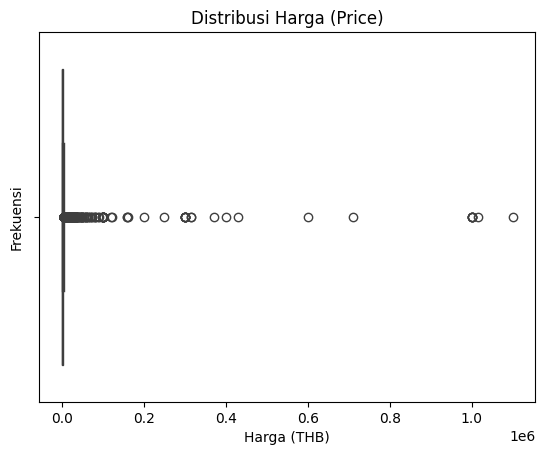

In [326]:
# Membuat boxplot
sns.boxplot(data = df_clean,
            x = 'price')
# Judul
plt.title('Distribusi Harga (Price)')

plt.xlabel('Harga (THB)')
plt.ylabel('Frekuensi')
# Menampilkan plot saja
plt.show()

## **Insight:**
1. Plot ini menunjukkan adanya banyak outliers dalam data harga. Outliers ini adalah harga-harga yang jauh lebih tinggi dibandingkan dengan mayoritas listing lainnya. Outliers ini mencakup harga yang mencapai hingga 1 juta THB atau lebih, yang mungkin menunjukkan properti mewah atau listing dengan harga yang tidak sesuai dengan pasar umum.
2. Sebagian besar harga listing terkonsentrasi di dekat bagian bawah rentang harga. Mayoritas listing memiliki harga yang relatif rendah dibandingkan dengan outliers, yang menunjukkan bahwa sebagian besar properti di pasar ini berada pada kisaran harga yang lebih terjangkau.
3. Distribusi harga mencakup rentang yang sangat luas, mulai dari harga yang sangat rendah hingga harga yang sangat tinggi (lebih dari 1 juta THB). Rentang ini menunjukkan adanya variasi yang signifikan dalam jenis dan kualitas properti yang ditawarkan.

In [327]:
# Memilih kolom numerik secara eksplisit dan kemudian menghitung korelasi
df_clean.corr(numeric_only=True)

,id,latitude,longitude,price,number_of_reviews,reviews_per_month,calculated_host_listings_count,number_of_reviews_ltm
id,1.000000,-0.019092,-0.005275,0.000243,-0.179266,0.214446,0.081057,-0.024479
latitude,-0.019092,1.000000,0.066264,-0.008006,-0.020971,-0.049868,-0.044059,-0.043800
longitude,-0.005275,0.066264,1.000000,-0.004588,-0.028367,-0.020382,-0.043784,-0.021050
price,0.000243,-0.008006,-0.004588,1.000000,-0.004372,-0.011569,-0.013304,-0.014167
number_of_reviews,-0.179266,-0.020971,-0.028367,-0.004372,1.000000,0.571886,0.036328,0.499413
reviews_per_month,0.214446,-0.049868,-0.020382,-0.011569,0.571886,1.000000,0.114961,0.642971
calculated_host_listings_count,0.081057,-0.044059,-0.043784,-0.013304,0.036328,0.114961,1.000000,0.111916
number_of_reviews_ltm,-0.024479,-0.043800,-0.021050,-0.014167,0.499413,0.642971,0.111916,1.000000


In [328]:
# np.triu --> upper triangle
matrix_triu = np.triu(df_clean.corr(numeric_only=True))
matrix_triu

array([[ 1.00000000e+00, -1.90924326e-02, -5.27485649e-03,
         2.42864911e-04, -1.79266268e-01,  2.14445626e-01,
         8.10570204e-02, -2.44788481e-02],
       [ 0.00000000e+00,  1.00000000e+00,  6.62642016e-02,
        -8.00583673e-03, -2.09713310e-02, -4.98677935e-02,
        -4.40588546e-02, -4.38004223e-02],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
        -4.58785390e-03, -2.83668032e-02, -2.03818074e-02,
        -4.37840575e-02, -2.10501487e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00, -4.37197044e-03, -1.15685254e-02,
        -1.33038661e-02, -1.41673101e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  5.71886137e-01,
         3.63281906e-02,  4.99412735e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         1.14960936e-01,  6.42970976e-01],
       [ 0.00000000e+00,  0.000000

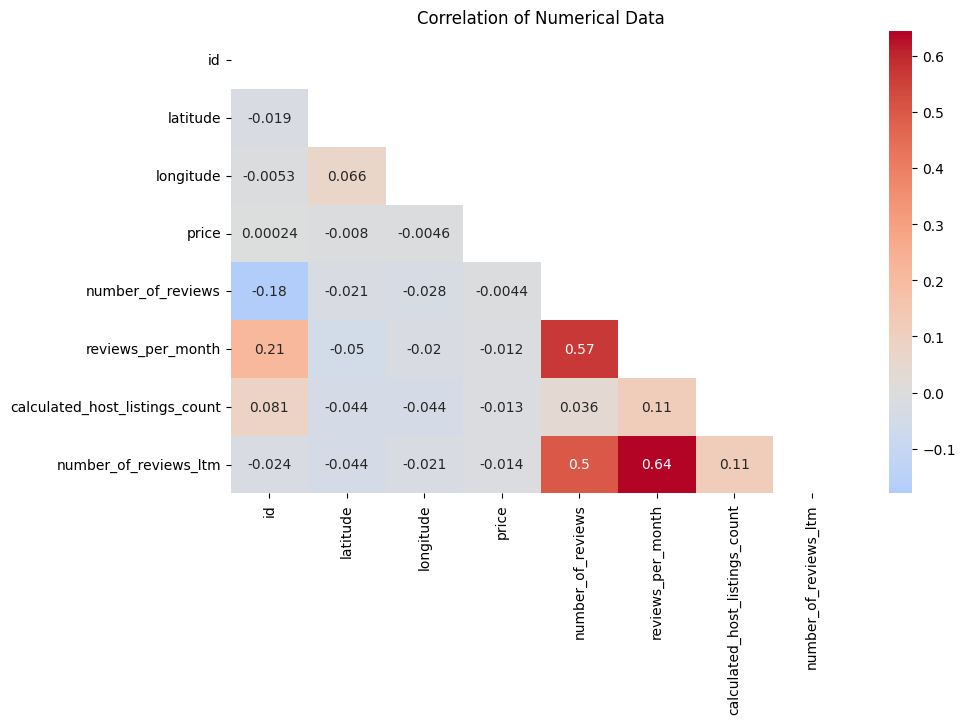

In [329]:
plt.figure(figsize=(10,6))
# visualisasi menggunakan heatmap
sns.heatmap(data = df_clean.corr(numeric_only=True),
            annot=True,
            cmap='coolwarm',
            mask = matrix_triu,
            center=0)

plt.title('Correlation of Numerical Data')
plt.show()

**Insight:**
- Warna yang semakin merah pekat, menandakan semakin kuat positif correlationnya
- Warna yang semakin biru pekat, menandakan semakin kuat negatif correlationnya
- Data yang memiliki nilai correlation paling kuat daripada yang lainnya ialah `Review_per_month` dan `Price`.
- Terdapat hubungan positif yang sangat kuat antara `reviews_per_month`, `number_of_reviews`, dan `number_of_reviews_ltm`. Karena, jika jumlah review keseluruhan tinggi, maka jumlah review bulanannya juga pasti tinggi.
- Terdapat korelasi positif yang lemah antara `reviews_per_month` dengan `calculated_host_listings_count`. Kita akan menganalisis kenapa hal ini terjadi.

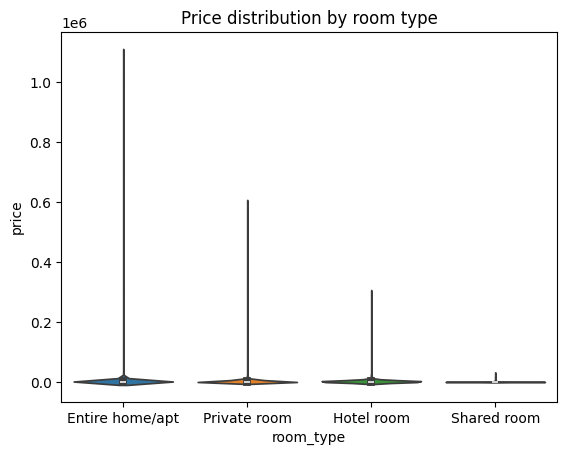

In [330]:
# Mengamati distribusi harga berdasarkan tipe kamar
viz1=sns.violinplot(data=df_clean, x='room_type', y='price',inner='box',hue='room_type')
viz1.set_title('Price distribution by room type')
plt.show()

## **Insight:**

1. `Entire home/apt`: Memiliki variasi harga yang paling luas, dengan beberapa outliers yang mencapai harga hingga sekitar 1 juta THB. Ini menunjukkan bahwa tipe kamar ini mencakup properti premium yang sangat mahal, mungkin karena seluruh rumah atau apartemen ditawarkan.
2. `Private room`: Memiliki variasi harga yang lebih kecil dibandingkan `Entire home/apt`, tetapi masih ada listing dengan harga yang relatif tinggi. Ini bisa mencerminkan bahwa kamar pribadi dalam lokasi atau properti tertentu dapat dihargai cukup tinggi.
3. `Hotel room`: Juga menunjukkan variasi harga yang moderat, dengan beberapa outliers yang memiliki harga tinggi, namun secara keseluruhan cenderung lebih konsisten dibandingkan `Entire home/apt`.
4. `Shared room`: Menunjukkan variasi harga yang paling kecil dan stabil, dengan tidak banyak variasi atau outliers. Ini mengindikasikan bahwa harga untuk tipe kamar ini cenderung lebih rendah dan lebih seragam.
5. Outliers yang sangat tinggi terutama terlihat pada `Entire home/apt`, `Private room`, dan `Hotel room`. Ini menunjukkan adanya listing dengan harga yang jauh di atas rata-rata, mungkin karena properti yang sangat mewah atau unik.

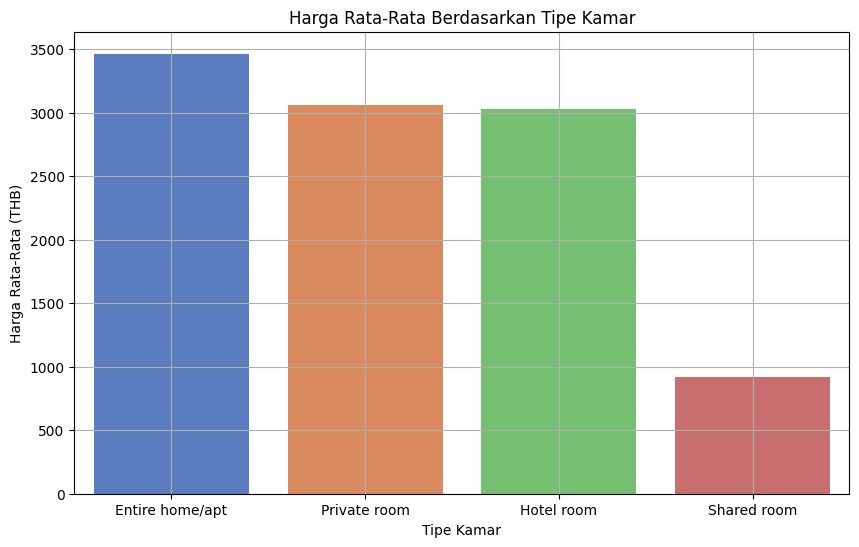

In [336]:
# Visualisasi harga rata-rata berdasarkan tipe kamar
room_type_mean_price = df_clean.groupby('room_type')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=room_type_mean_price.index, y=room_type_mean_price.values, palette="muted")
plt.title('Harga Rata-Rata Berdasarkan Tipe Kamar')
plt.xlabel('Tipe Kamar')
plt.ylabel('Harga Rata-Rata (THB)')
plt.grid(True)
plt.show()

## **Insight :**

1. Entire home/apt memiliki harga rata-rata tertinggi, diikuti oleh Private room dan Hotel room.
2. Shared room memiliki harga rata-rata paling rendah, yang konsisten dengan harapan karena jenis kamar ini biasanya lebih terjangkau.

**Apa saja faktor utama yang mempengaruhi harga sewa Term dari listing Airbnb di Bangkok?**

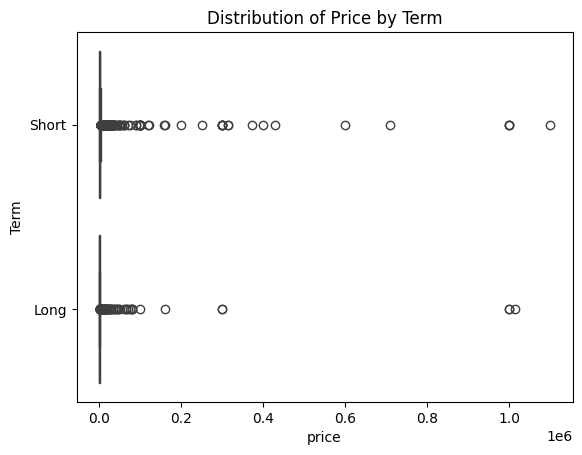

In [337]:
# Membuat boxplot
sns.boxplot(data = df_clean,
            x = 'price',
            y = 'Term')
# Judul
plt.title('Distribution of Price by Term')

# Menampilkan plot saja
plt.show()

**Insight:**

1. Baik untuk Short Term (sewa jangka pendek) maupun Long Term (sewa jangka panjang), terdapat listing dengan harga yang bervariasi secara signifikan, mulai dari harga yang sangat rendah hingga sangat tinggi. Ini menunjukkan bahwa ada fleksibilitas dalam penetapan harga, terlepas dari durasi sewa
2. Terdapat beberapa outliers yang sangat tinggi di kedua kategori Short Term dan Long Term. Ini mungkin mencerminkan properti premium atau properti dengan fitur unik yang menargetkan segmen pasar dengan daya beli tinggi.
3. Beberapa listing pada Long Term mencapai harga yang sangat tinggi, bahkan di atas 1 juta THB. Ini mungkin menunjukkan bahwa untuk penyewaan jangka panjang, ada permintaan untuk properti premium yang menawarkan fasilitas lengkap, kenyamanan, atau lokasi strategis yang sangat dicari.
4. Distribusi harga di kedua kategori tampaknya cukup mirip, dengan mayoritas listing terkonsentrasi di rentang harga yang lebih rendah, meskipun ada penyebaran ke harga yang lebih tinggi. Ini menunjukkan bahwa baik untuk sewa jangka pendek maupun jangka panjang, pasar cenderung menetapkan harga yang beragam sesuai dengan berbagai faktor, seperti lokasi, fasilitas, dan tipe properti.

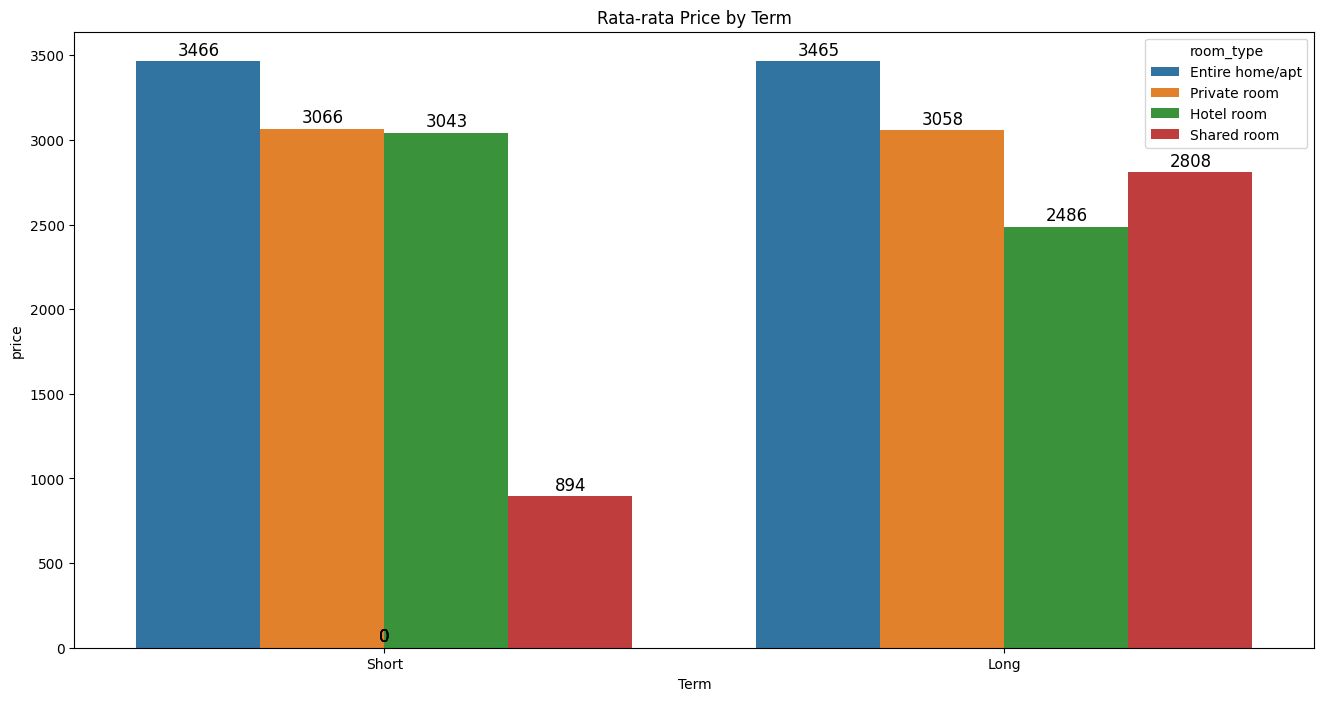

In [338]:
# membuat bar chart
plt.figure(figsize=(16,8))
plots = sns.barplot(data = df_clean,
            x = 'Term',
            y = 'price',
            estimator = np.mean,
            ci = 0,
            hue = 'room_type')

# judul grafik
plt.title('Rata-rata Price by Term')

# menambahkan anotasi pada tiap bar
for bar in plots.patches:

    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

**Insight:**

1. `Entire home/apt`: Menunjukkan harga rata-rata tertinggi baik untuk sewa jangka pendek (Short Term) maupun jangka panjang (Long Term), dengan harga rata-rata sedikit lebih tinggi untuk sewa jangka pendek (3466 THB) dibandingkan dengan jangka panjang (3465 THB). Ini menunjukkan bahwa properti jenis ini dihargai paling mahal dan tetap stabil baik untuk sewa jangka pendek maupun panjang.
2. `Private room` dan `Hotel room`: Kedua tipe kamar ini menunjukkan sedikit penurunan harga rata-rata saat durasi sewa bergeser dari Short Term ke Long Term. Hal ini mungkin disebabkan oleh diskon yang diberikan untuk penyewaan jangka panjang untuk menarik penyewa yang ingin tinggal lebih lama.
3. `Shared room`: Menariknya, harga rata-rata untuk Shared room jauh lebih rendah pada sewa jangka pendek (894 THB) dibandingkan dengan jangka panjang (2808 THB). Ini mungkin mencerminkan perbedaan signifikan dalam segmen pasar atau strategi penetapan harga di mana penyewa jangka panjang untuk tipe kamar ini bersedia membayar lebih untuk keamanan tinggal lebih lama.
4. `Entire home/apt` mempertahankan harga rata-rata yang hampir sama untuk kedua durasi sewa, menunjukkan stabilitas harga yang mungkin dihasilkan dari daya tarik properti ini bagi berbagai jenis penyewa. Hal ini mungkin menunjukkan bahwa properti semacam ini memiliki pasar yang stabil dan demand yang konsisten terlepas dari durasi sewa.
5. `Hotel room`: Tipe kamar ini menunjukkan penurunan harga yang lebih besar dari sewa jangka pendek ke jangka panjang (dari 3043 THB ke 2486 THB). Ini menunjukkan bahwa pemilik properti cenderung memberikan insentif atau diskon untuk penyewaan yang lebih lama, yang mungkin untuk mengamankan pendapatan jangka panjang dengan menawarkan harga yang lebih kompetitif.


## **2. Bagaimana `neighbourhood` dan `room_type` mempengaruhi tingkat hunian ?**

In [339]:
# Hitung jumlah dan persentase untuk setiap room_type
room_type_counts = df_clean['room_type'].value_counts()
room_type_percentages = df_clean['room_type'].value_counts(normalize=True) * 100

# Buat DataFrame untuk menampilkan jumlah dan persentase
room_type_summary = pd.DataFrame({
    'count': room_type_counts,
    'percentage': room_type_percentages
})
room_type_summary

,count,percentage
room_type,,
Entire home/apt,8912,56.216489
Private room,5769,36.390589
Hotel room,649,4.093862
Shared room,523,3.299060


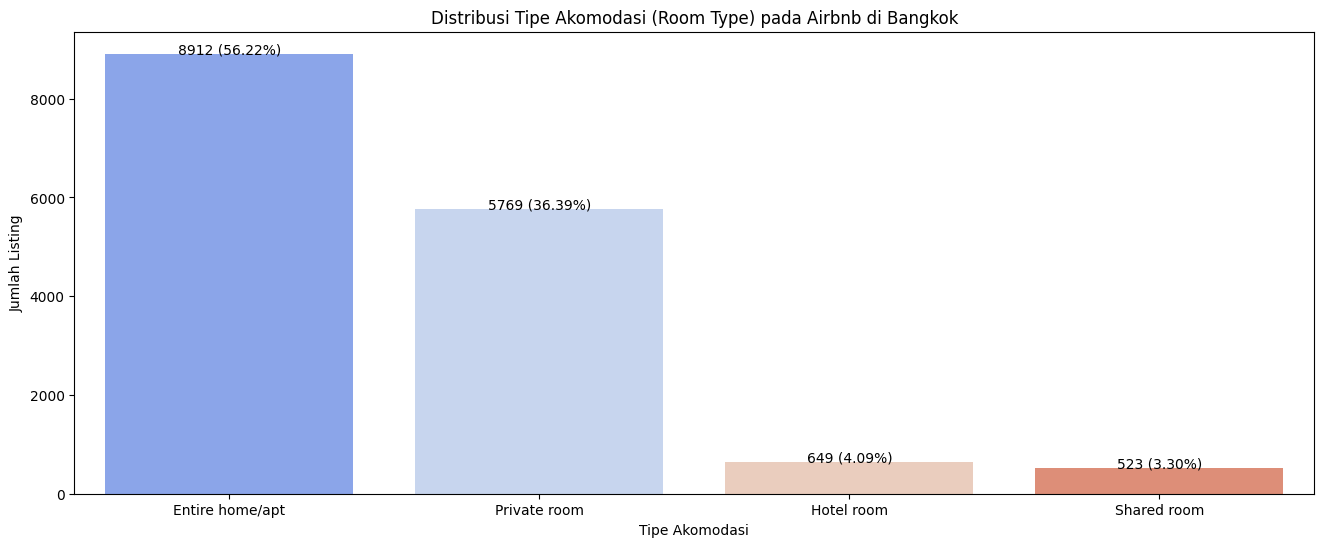

In [340]:
# Visualisasi distribusi jumlah room_type
plt.figure(figsize=(16, 6))
ax = sns.barplot(x=room_type_summary.index, 
                 y=room_type_summary['count'],
                 palette="coolwarm")

# Tambahkan total dan persentase di atas setiap batang
for i, (count, percentage) in enumerate(zip(room_type_summary['count'], room_type_summary['percentage'])):
    ax.text(i, count + 5, f'{count} ({percentage:.2f}%)', ha='center')

plt.title('Distribusi Tipe Akomodasi (Room Type) pada Airbnb di Bangkok')
plt.xlabel('Tipe Akomodasi')
plt.ylabel('Jumlah Listing')
plt.show()

## **Insight:**

1. Tipe akomodasi `Entire home/apt` mendominasi pasar Airbnb di Bangkok, dengan 56,22% dari total listing. Ini menunjukkan bahwa mayoritas tuan rumah di Bangkok lebih memilih menyewakan seluruh rumah atau apartemen mereka kepada tamu, yang mungkin menarik bagi wisatawan yang mencari privasi dan kenyamanan seperti di rumah sendiri.
2. Tipe `Private room` adalah tipe akomodasi kedua yang paling umum, dengan 36,39% dari total listing. Ini menunjukkan adanya permintaan signifikan untuk kamar privat di mana tamu bisa berbagi ruang dengan pemilik atau penyewa lainnya, biasanya dengan harga yang lebih terjangkau dibandingkan menyewa seluruh rumah.
3. Tipe `Hotel room` dan "Shared room" memiliki persentase yang jauh lebih kecil, masing-masing hanya 4,09% dan 3,30% dari total listing. Ini menunjukkan bahwa hanya sebagian kecil tuan rumah yang menawarkan kamar hotel tradisional atau ruang berbagi, yang mungkin mencerminkan preferensi tamu yang lebih condong ke pengalaman menginap yang lebih pribadi dan berbeda dari akomodasi hotel biasa.

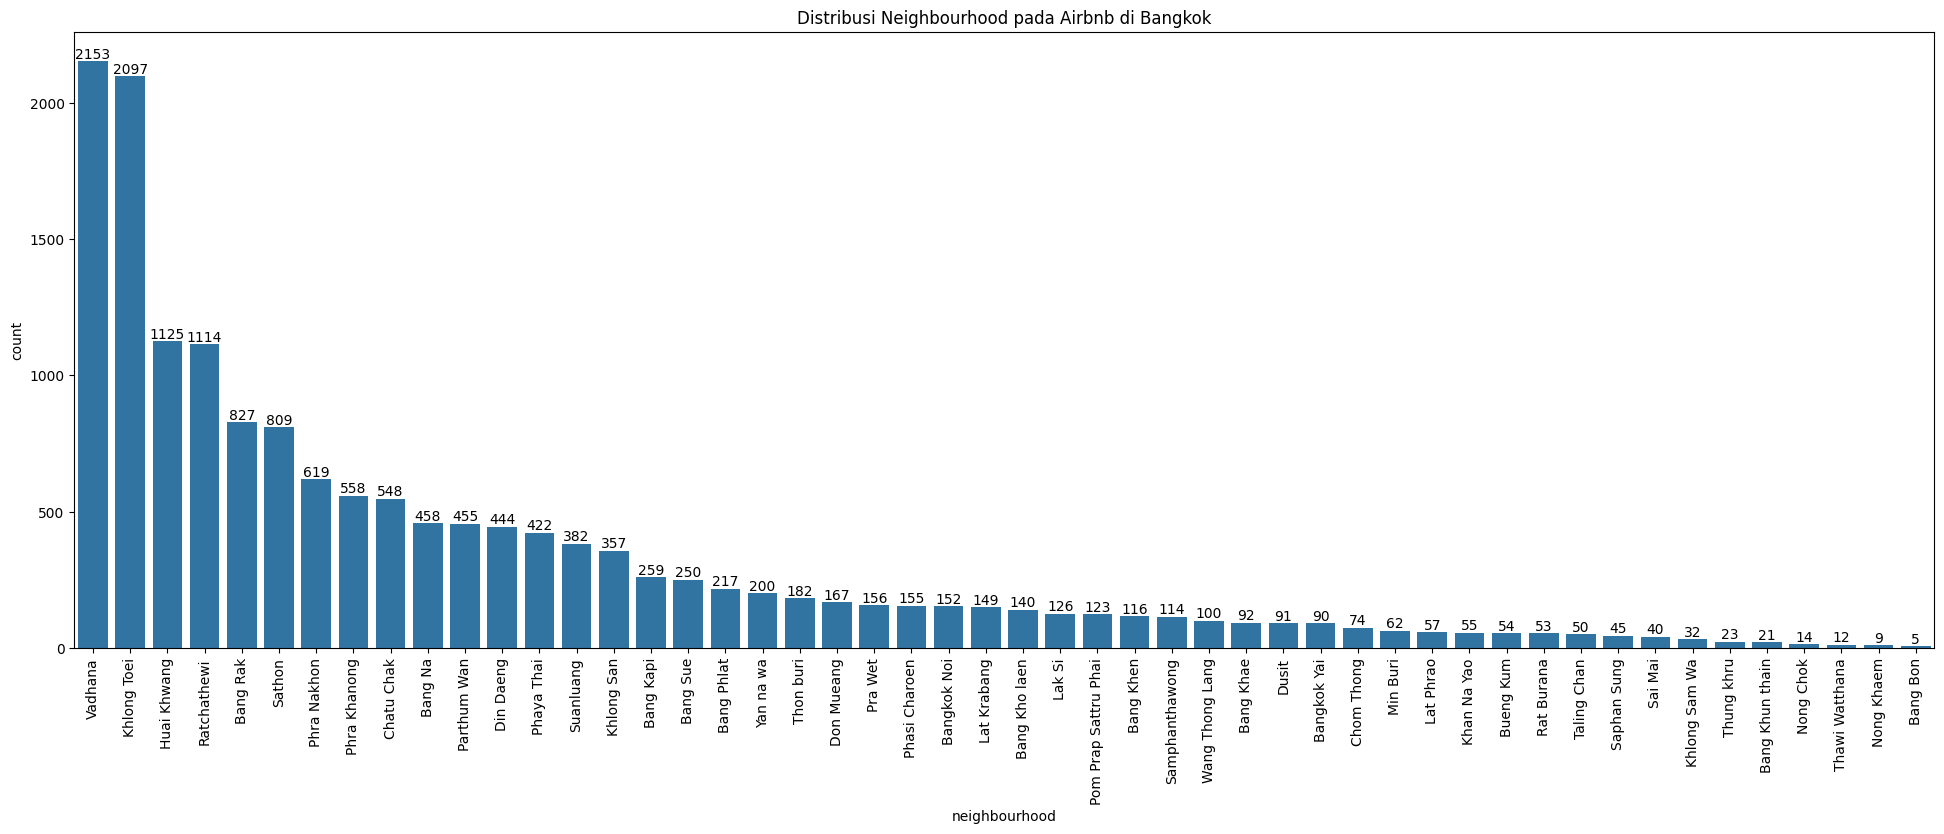

In [341]:
# using countplot to visualize the number of Airbnbs in each neighbourhood
plt.figure(figsize = (24,8))
ax = sns.countplot(x='neighbourhood', data=df_clean, order=df_clean['neighbourhood'].value_counts().index)
abs_values = df_clean['neighbourhood'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title('Distribusi Neighbourhood pada Airbnb di Bangkok')
plt.xticks(rotation=90)
plt.show()

## **Insight:**

1. `Wattana` dan `Khlong Toei` mendominasi jumlah listing di Bangkok, dengan masing-masing lebih dari 2000 listing. Ini menunjukkan bahwa area-area ini adalah hotspot utama untuk Airbnb di Bangkok, kemungkinan besar karena lokasinya yang strategis, akses ke fasilitas, dan daya tarik wisatawan
2. Distribusi listing Airbnb sangat tidak merata di berbagai neighbourhood. Setelah Wattana dan Khlong Toei, ada penurunan yang signifikan dalam jumlah listing, dengan neighbourhood lainnya seperti `Ratchathewi` dan `Huai Khwang` memiliki jumlah listing yang lebih sedikit, namun tetap signifikan.

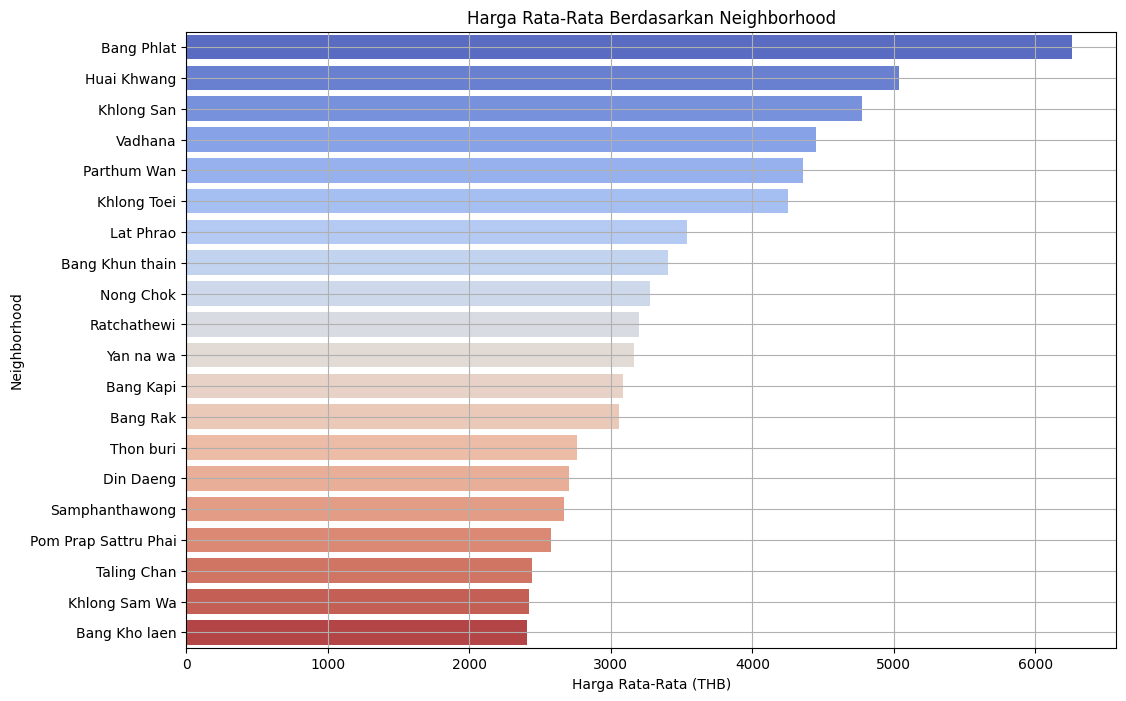

In [342]:
# Visualisasi harga rata-rata berdasarkan neighborhood
neighborhood_mean_price = df_clean.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(y=neighborhood_mean_price.index, x=neighborhood_mean_price.values, palette="coolwarm")
plt.title('Top 20 Harga Rata-Rata Berdasarkan Neighborhood')
plt.xlabel('Harga Rata-Rata (THB)')
plt.ylabel('Neighborhood')
plt.grid(True)
plt.show()

## **Insight :**

1. `Bang Phlat`, `Huai Khwang`, dan `Khlong San` memiliki harga rata-rata tertinggi. Ini menunjukkan bahwa kawasan-kawasan ini mungkin merupakan area yang lebih premium atau memiliki daya tarik khusus, baik dari segi lokasi, fasilitas, atau aksesibilitas.
2. `Lak Si`, `Nong Khaem`, dan `Don Mueang` berada di ujung spektrum dengan harga rata-rata lebih rendah. Kawasan-kawasan ini mungkin kurang diminati atau memiliki lebih banyak penawaran dengan harga terjangkau.
3. Ada variasi yang signifikan dalam harga sewa berdasarkan neighborhood, yang menunjukkan bahwa lokasi adalah faktor penting dalam menentukan harga sewa per malam.

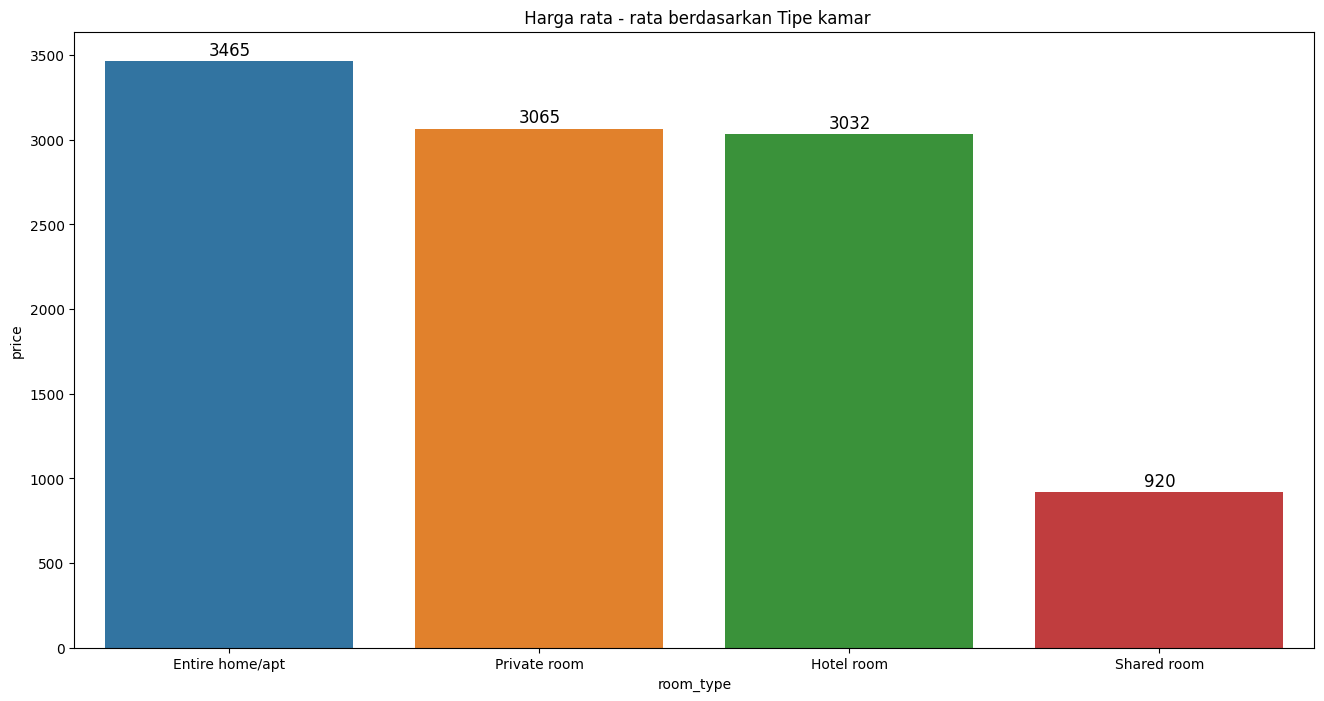

In [343]:
# membuat bar chart
plt.figure(figsize=(16,8))
plots = sns.barplot(data = df_clean,
            x = 'room_type',
            y = 'price',
            estimator = 'mean',
            ci = 0,
            palette='tab10')

# judul grafik
plt.title(' Harga rata - rata berdasarkan Tipe kamar')

# menambahkan anotasi pada tiap bar
for bar in plots.patches:

  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

## **Insight:**

1. Tipe kamar `Entire home/apt` memiliki harga rata-rata tertinggi di antara semua tipe kamar, yaitu 3465 THB. Hal ini menunjukkan bahwa seluruh rumah atau apartemen yang disewakan memiliki nilai yang lebih tinggi, mungkin karena menawarkan privasi penuh dan fasilitas yang lebih lengkap dibandingkan dengan tipe kamar lainnya.
2. Tipe kamar `Private room` dan Hotel room memiliki harga rata-rata yang cukup mirip, yaitu masing-masing 3065 THB dan 3032 THB. Ini menunjukkan bahwa kamar pribadi dan kamar hotel berada di segmen pasar yang serupa, dengan daya tarik yang mungkin sedikit berbeda tetapi tetap berada di kisaran harga yang sama.
3. `Shared room` memiliki harga rata-rata yang jauh lebih rendah dibandingkan tipe kamar lainnya, yaitu 920 THB. Ini masuk akal karena kamar bersama biasanya dihargai lebih rendah karena tamu harus berbagi ruang dengan orang lain, menjadikannya pilihan yang lebih terjangkau
4. Harga yang sangat bervariasi ini menunjukkan segmentasi pasar yang jelas. `Entire home/apt` menargetkan tamu yang mencari privasi dan kenyamanan penuh dan bersedia membayar lebih untuk itu. `Private room` dan `Hotel room` menargetkan tamu yang mencari keseimbangan antara privasi dan harga, sementara Shared room menargetkan pelancong dengan anggaran terbatas yang lebih peduli tentang harga daripada privasi.


## **3. Apakah ada hubungan antara `number_of_reviews` dengan `price` atau `room_type`?**

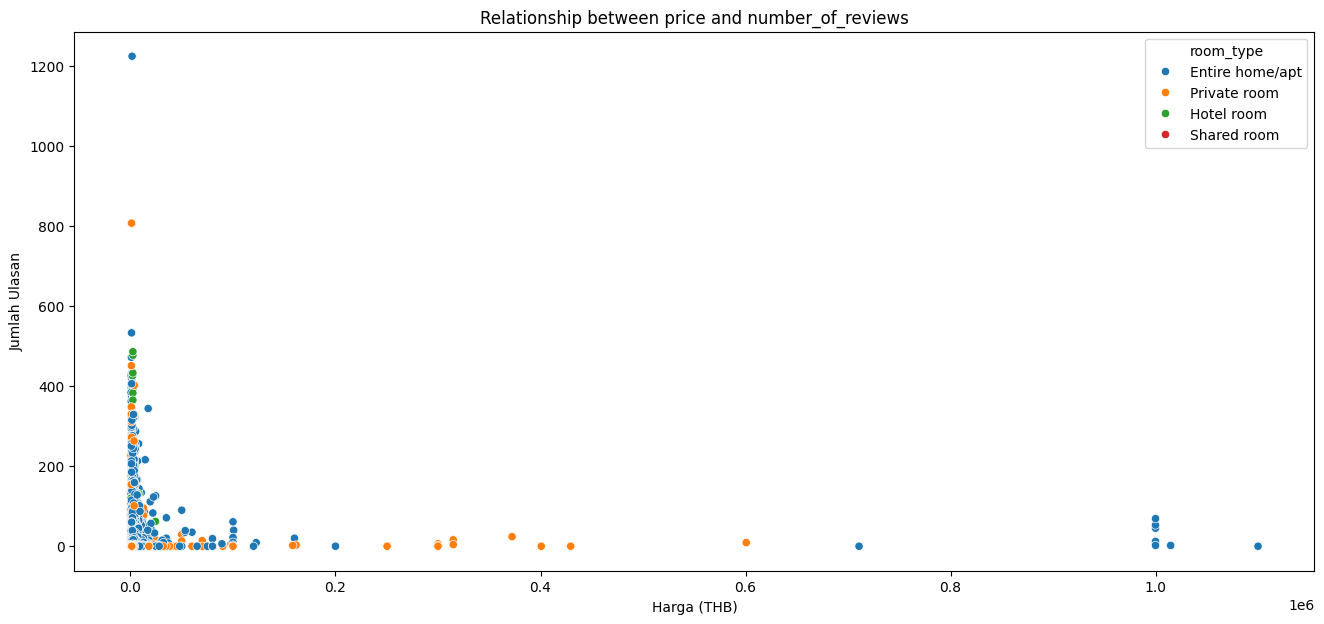

In [344]:

# Sebaran untuk memvisualisasikan hubungan antara jumlah ulasan dan harga
plt.figure(figsize=(16,7))

sns.scatterplot(data = df_clean,
                x='price',
                y = 'number_of_reviews',
                hue = 'room_type')

plt.title('Relationship between price and number_of_reviews')
plt.xlabel('Harga (THB)')
plt.ylabel('Jumlah Ulasan')

plt.show()

## **Insight:**


1. Mayoritas listing dengan harga lebih rendah (di bawah 200.000 THB) memiliki jumlah ulasan yang lebih tinggi. Ini menunjukkan bahwa properti dengan harga lebih rendah cenderung lebih sering dipesan dan menerima lebih banyak ulasan. Hal ini masuk akal karena harga yang lebih terjangkau menarik lebih banyak tamu.
2. Listing dengan harga yang sangat tinggi (di atas 600.000 THB) umumnya memiliki jumlah ulasan yang sangat sedikit atau bahkan tidak ada. Hal ini mungkin disebabkan oleh fakta bahwa properti-properti ini menargetkan segmen pasar yang sangat kecil dan premium, yang menghasilkan volume pemesanan lebih rendah.
3. Ada beberapa outliers yang mencolok, terutama di bagian harga rendah (sekitar 0-200.000 THB), di mana beberapa listing memiliki jumlah ulasan yang sangat tinggi, bahkan mencapai lebih dari 1000 ulasan. Outliers ini menunjukkan listing yang sangat populer dan sering dipesan, mungkin karena kombinasi harga terjangkau, lokasi strategis, atau fasilitas yang baik.
4. Entire home/apt: Sebagian besar listing Entire home/apt berada di rentang harga yang lebih tinggi, namun jumlah ulasan mereka relatif lebih rendah dibandingkan listing dengan harga rendah
5. Private room dan Hotel room: Kedua tipe kamar ini cenderung berada di rentang harga yang lebih rendah dan memiliki variasi jumlah ulasan yang lebih besar.
6. Shared room: Listing Shared room memiliki jumlah ulasan yang relatif tinggi untuk harga rendah, menunjukkan bahwa segmen ini cukup populer di kalangan pelancong hemat.

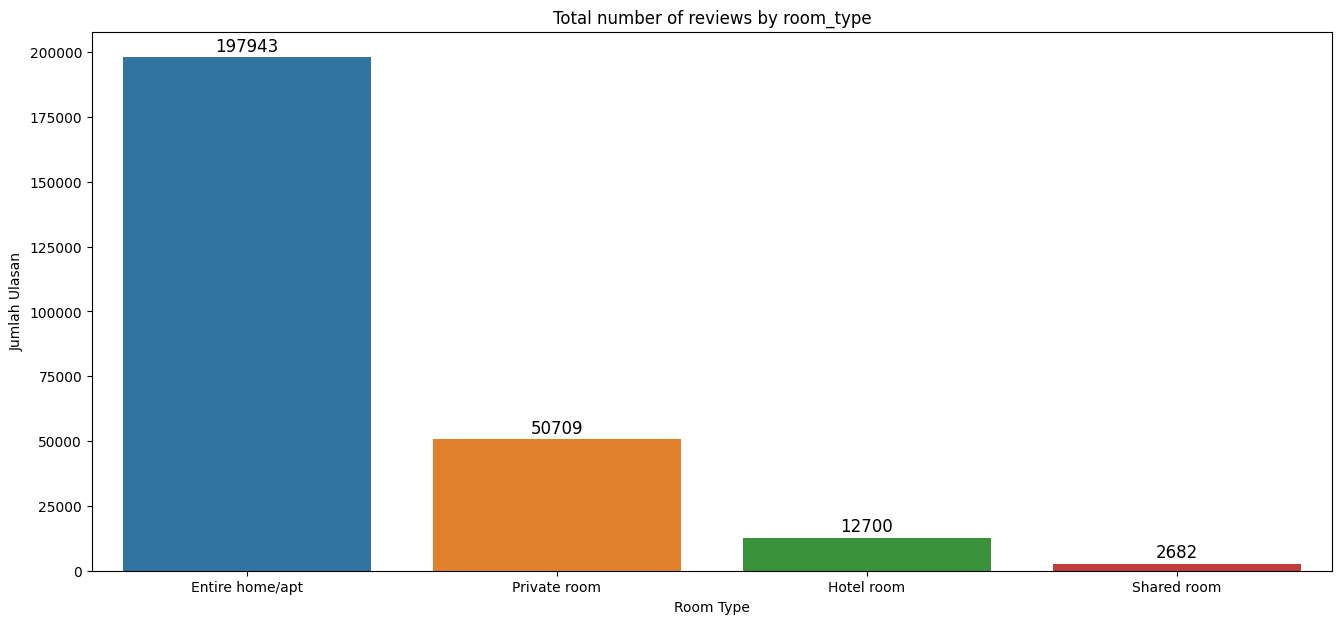

In [345]:
# membuat bar chart jumlah ulasan berdasarkan room_type
plt.figure(figsize=(16,7))
plots = sns.barplot(data = df_clean,
            x = 'room_type',
            y = 'number_of_reviews',
            estimator = np.sum,
            ci = 0,
            palette='tab10')

# judul grafik
plt.title('Total number of reviews by room_type')

plt.xlabel('Room Type')
plt.ylabel('Jumlah Ulasan')

# menambahkan anotasi pada tiap bar
for bar in plots.patches:

  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

## **Insight:**

1. Tipe kamar `Entire home/apt` mendominasi secara signifikan dengan total 197.943 ulasan. Ini menunjukkan bahwa tipe kamar ini adalah yang paling populer di antara para tamu, kemungkinan karena memberikan privasi penuh dan kenyamanan seperti di rumah sendiri.
2. Tipe kamar `Private room` berada di posisi kedua dengan 50.709 ulasan. Meskipun tidak sepopuler `Entire home/apt`, tipe ini masih memiliki daya tarik yang besar, mungkin karena menawarkan keseimbangan antara privasi dan harga yang lebih terjangkau.
3. Tipe kamar `Hotel room` hanya memiliki 12.700 ulasan, menunjukkan bahwa tipe ini kurang diminati oleh tamu dibandingkan dengan `Entire home/apt` atau `Private room`. Hal ini bisa jadi karena tamu lebih memilih pengalaman unik dan personal yang ditawarkan oleh properti non-hotel.
4. Tipe kamar `Shared room` memiliki jumlah ulasan paling sedikit, yaitu 2.682 ulasan. Ini menunjukkan bahwa tipe ini kurang populer, mungkin karena tamu umumnya menginginkan lebih banyak privasi.

## **4. Bagaimana pola `availability_365` dan `Term` mempengaruhi performa listing?**

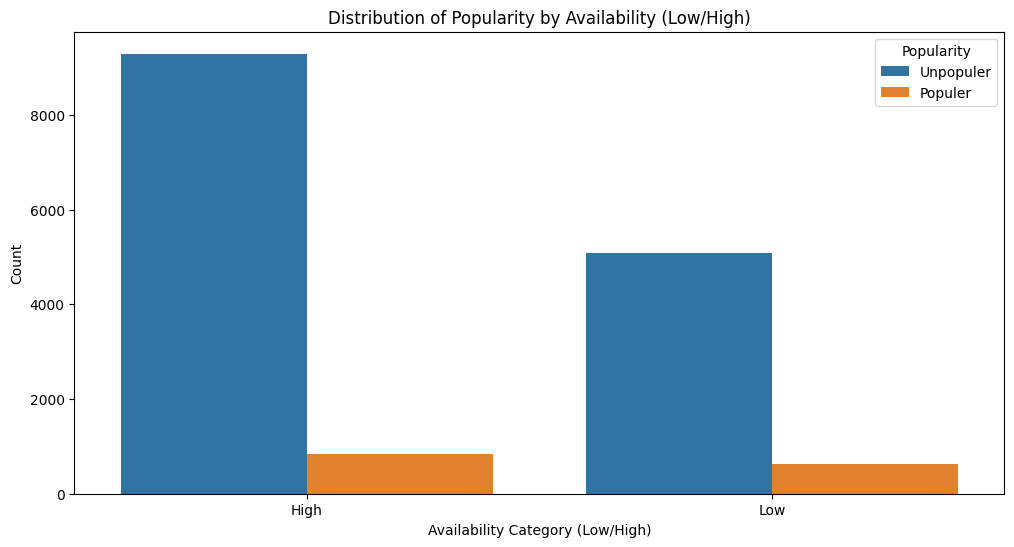

In [ ]:
# Countplot for availability_365 and Popularity
plt.figure(figsize=(12, 6))
sns.countplot(data=df_clean, x='availability_365', hue='Popularity')
plt.title('Distribution of Popularity by Availability (Low/High)')
plt.xlabel('Availability Category (Low/High)')
plt.ylabel('Count')
plt.show()

## **Insight:**

1. Sebagian besar listing dengan ketersediaan tinggi (High Availability) masuk dalam kategori "Unpopuler". Ini menunjukkan bahwa listing yang sering tersedia cenderung tidak banyak dipesan, mungkin karena faktor-faktor seperti harga yang tidak kompetitif, lokasi yang kurang strategis, atau kurangnya daya tarik lainnya.
2. Listing dengan ketersediaan rendah (Low Availability) memiliki proporsi yang lebih besar dari kategori "Populer" dibandingkan dengan listing yang memiliki ketersediaan tinggi. Hal ini menunjukkan bahwa listing yang sering dipesan dan jarang tersedia cenderung lebih populer. Popularitas ini mungkin disebabkan oleh faktor-faktor seperti harga yang kompetitif, lokasi yang baik, ulasan positif, atau fasilitas yang menarik.

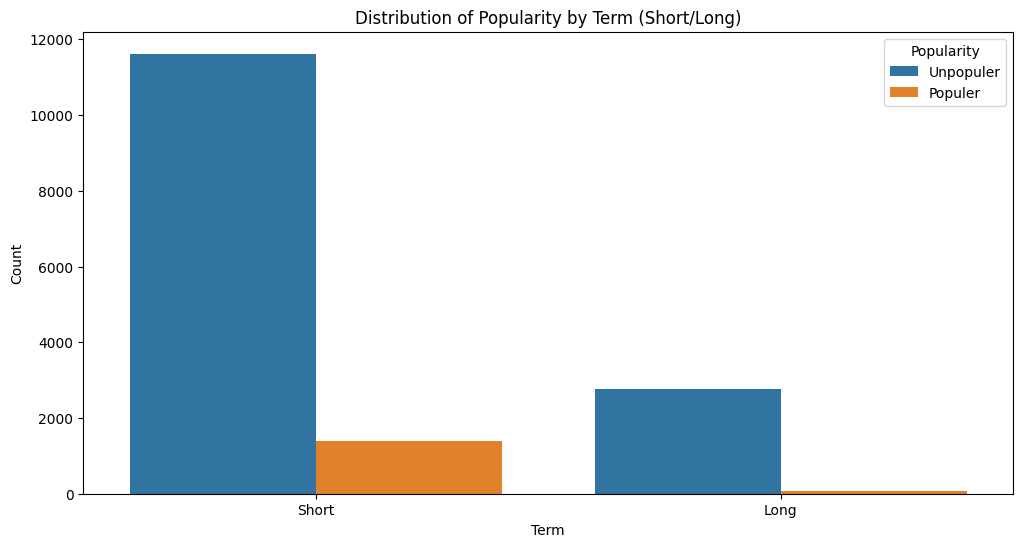

In [ ]:
# Countplot for Term and Popularity
plt.figure(figsize=(12, 6))
sns.countplot(data=df_clean, x='Term', hue='Popularity')
plt.title('Distribution of Popularity by Term (Short/Long)')
plt.xlabel('Term')
plt.ylabel('Count')
plt.show()

## **Insight:**

1. Listing dengan durasi jangka pendek (Short Term) mendominasi baik dalam kategori tidak populer (Unpopuler) maupun populer (Populer). Ini menunjukkan bahwa listing jangka pendek lebih umum dan memiliki potensi untuk menjadi populer lebih tinggi dibandingkan dengan listing jangka panjang.
2. Meskipun lebih banyak listing jangka pendek yang tidak populer, jumlah listing yang populer dalam kategori ini juga jauh lebih banyak dibandingkan listing jangka panjang.
3. Listing dengan durasi jangka panjang (Long Term) memiliki jumlah yang jauh lebih sedikit dan hampir semuanya masuk ke dalam kategori tidak populer. Sangat sedikit listing jangka panjang yang berhasil menjadi populer.
4. Hal ini mungkin disebabkan oleh preferensi tamu yang lebih mengutamakan fleksibilitas dan kepraktisan yang ditawarkan oleh listing jangka pendek.


# **4. Conclusion and Recommendation** 

## **4.1 Conclusion**

**Dari analisis yang telah dilakukan sebelumnya, ada beberapa insight yang didapat:**
<br>
    <br>

**General**:
1. Terdapat 4 tipe kamar yang ditawarkan ('Entire home/apt', 'Private room', 'Hotel room', dan 'Shared room'). Tipe kamar yang paling banyak ditawarkan adalah 'Entire home/apt', dan 'Private room'.
2. Listing populer didominasi oleh 'Entire home/apt' dan 'Private room'

<br>
    <br>
    
1. `Price` (Harga):

    - Korelasi Harga dan Popularitas: Properti dengan harga yang lebih rendah cenderung mendapatkan lebih banyak ulasan dan memiliki popularitas yang lebih tinggi. Ini menunjukkan bahwa harga merupakan faktor kritis dalam menarik tamu di pasar Airbnb. Properti dengan harga di bawah kisaran rata-rata lebih sering dipesan, yang meningkatkan jumlah ulasan dan eksposur mereka di platform.
    - Outlier pada Properti Mahal: Meskipun ada beberapa properti dengan harga sangat tinggi (melebihi 400.000 THB hingga 1 juta THB), properti-properti ini cenderung memiliki jumlah ulasan yang rendah. Hal ini mengindikasikan bahwa properti tersebut mungkin lebih eksklusif, menargetkan pasar yang sempit, atau menawarkan fasilitas mewah yang hanya menarik bagi segmen tertentu.

<br>
    <br>

2. `Room Type` (Tipe Kamar):

    - Dominasi `Entire home/apt`: Tipe kamar `Entire home/apt` mendominasi pasar Airbnb di Bangkok baik dalam jumlah listing maupun jumlah ulasan. Ini menunjukkan preferensi yang kuat di kalangan tamu untuk menyewa seluruh rumah atau apartemen, yang menawarkan lebih banyak privasi dan ruang. Dengan hampir 200.000 ulasan, `Entire home/apt` adalah tipe kamar yang paling populer dan paling sering dipesan.
    - Popularitas `Private room`: `Private room` juga cukup populer dengan lebih dari 50.000 ulasan, menunjukkan bahwa tamu yang mencari opsi lebih hemat tetapi tetap menginginkan privasi cenderung memilih tipe kamar ini.
    - Kurangnya Minat pada `Shared room `dan `Hotel room`:` Shared room` dan Hotel room memiliki jumlah ulasan yang jauh lebih rendah, masing-masing sekitar 2.682 dan 12.700 ulasan. Ini menunjukkan bahwa tamu lebih jarang memilih opsi ini, mungkin karena keterbatasan privasi atau kurangnya daya tarik unik dibandingkan dengan `Entire home/apt` atau `Private room`.

<br>
    <br>

3. `Number of Reviews` (Jumlah Ulasan):

    - Hubungan Antara Harga dan Ulasan: Properti dengan harga yang lebih rendah cenderung menarik lebih banyak tamu, yang menghasilkan jumlah ulasan yang lebih tinggi. Hal ini   mengindikasikan bahwa tamu cenderung lebih sensitif terhadap harga, dan properti yang menawarkan nilai yang baik (harga terjangkau dengan fasilitas memadai) lebih sering dipesan
    - Peran Ulasan dalam Meningkatkan Popularitas: Jumlah ulasan yang tinggi tidak hanya mencerminkan popularitas properti tetapi juga membantu meningkatkan kepercayaan tamu baru, menciptakan siklus positif di mana ulasan yang tinggi menarik lebih banyak tamu, yang pada gilirannya menghasilkan lebih banyak ulasan.

<br>
    <br>

4. `Term` (Durasi Sewa):

    - Preferensi untuk Sewa Jangka Pendek: Mayoritas tamu Airbnb di Bangkok lebih memilih sewa jangka pendek. Properti yang ditawarkan untuk sewa jangka pendek mendominasi pasar dan memiliki jumlah ulasan yang lebih tinggi. Ini menunjukkan bahwa pasar Airbnb di Bangkok lebih didorong oleh pelancong jangka pendek, seperti turis atau pelancong bisnis yang membutuhkan akomodasi hanya untuk beberapa hari hingga minggu.
    - Keterbatasan Pasar untuk Sewa Jangka Panjang: Properti dengan sewa jangka panjang cenderung kurang populer dan memiliki lebih sedikit ulasan. Hal ini menunjukkan bahwa ada pasar yang lebih kecil untuk penyewaan jangka panjang di Airbnb, mungkin karena orang yang membutuhkan sewa jangka panjang lebih cenderung mencari akomodasi melalui platform lain atau secara langsung dengan pemilik properti.

<br>
    <br>

5. `Availability` (Ketersediaan):

    - Ketersediaan Sebagai Indikator Popularitas: Properti dengan ketersediaan tinggi (artinya sering tidak dipesan) cenderung kurang populer. Sebaliknya, properti dengan ketersediaan rendah (sering dipesan) cenderung lebih populer. Ini menunjukkan bahwa properti yang sering dipesan memiliki daya tarik yang kuat di kalangan tamu, yang dapat disebabkan oleh kombinasi harga, lokasi, dan tipe kamar.
    - Manajemen Ketersediaan untuk Meningkatkan Pendapatan: Pemilik properti perlu memperhatikan ketersediaan properti mereka sebagai indikator kesehatan bisnis. Properti dengan ketersediaan tinggi mungkin perlu meninjau kembali strategi penetapan harga, pemasaran, atau ulasan untuk meningkatkan daya tarik dan popularitasnya.
    
<br>
    <br>

- `Kesimpulan Umum`: Dalam pasar Airbnb di Bangkok, harga, tipe kamar, dan ketersediaan semuanya saling terkait dan memainkan peran penting dalam menentukan popularitas dan jumlah ulasan yang diterima oleh sebuah properti. Pemilik properti yang fokus pada menawarkan nilai yang baik melalui harga kompetitif, tipe kamar yang diinginkan, dan memastikan properti mereka dikelola dengan baik dapat meningkatkan popularitas dan, pada akhirnya, pendapatan mereka. Sewa jangka pendek tetap menjadi segmen pasar yang dominan, dan pemilik harus mempertimbangkan untuk menargetkan pasar ini untuk memaksimalkan jumlah tamu dan ulasan.

## **4.2 Recommendation**

1. `Optimalkan Penetapan Harga`:

    - Strategi Penetapan Harga Kompetitif: Mengingat hubungan langsung antara harga dan popularitas, pemilik properti harus mempertimbangkan untuk menetapkan harga yang kompetitif, terutama jika properti mereka termasuk dalam kategori Private room atau Entire home/apt. Analisis pasar lokal untuk menetapkan harga yang sesuai dengan fasilitas yang ditawarkan sangat penting.
    - Harga Dinamis: Pertimbangkan untuk menerapkan strategi harga dinamis yang menyesuaikan harga berdasarkan permintaan musiman, acara lokal, atau ketersediaan umum di area tersebut. Ini akan membantu mengoptimalkan pendapatan sambil tetap menarik tamu pada saat permintaan rendah.

2. `Diversifikasi Tipe Akomodasi`:

    - Penawaran yang Beragam: Jika memungkinkan, tawarkan berbagai jenis akomodasi seperti Entire home/apt dan Private room untuk menarik berbagai segmen tamu. Dengan memiliki variasi tipe kamar, pemilik dapat menjangkau lebih banyak tamu dengan preferensi yang berbeda-beda.
    - Tingkatkan Daya Tarik Shared room dan Hotel room: Untuk Shared room dan Hotel room, fokuslah pada pengalaman unik atau layanan tambahan yang dapat meningkatkan daya tarik tipe kamar ini, seperti menyediakan sarapan gratis atau tur lokal.

3. `Fokus pada Ulasan dan Layanan Tamu`:

    - Dorong Ulasan Positif: Aktif mendorong tamu untuk meninggalkan ulasan setelah menginap, terutama untuk properti dengan harga menengah ke bawah. Lebih banyak ulasan dapat meningkatkan visibilitas properti di platform dan membangun kepercayaan calon tamu.
    - Tingkatkan Layanan: Tingkatkan pengalaman tamu dengan memberikan layanan yang melebihi harapan, seperti respons cepat terhadap permintaan, panduan lokal yang komprehensif, dan fasilitas tambahan. Layanan yang luar biasa akan mendorong tamu untuk memberikan ulasan positif dan merekomendasikan properti kepada orang lain.

4. `Pertimbangkan Durasi Sewa Jangka Pendek`:

    - Manfaatkan Pasar Jangka Pendek: Mengingat bahwa sewa jangka pendek lebih populer, pemilik properti harus fokus pada strategi pemasaran dan penetapan harga untuk durasi ini. Pertimbangkan untuk menawarkan diskon bagi tamu yang memesan beberapa hari atau lebih untuk meningkatkan tingkat hunian.
    - Fleksibilitas dalam Kebijakan Sewa: Berikan fleksibilitas dalam kebijakan pemesanan dan pembatalan untuk menarik lebih banyak pelancong jangka pendek. Fleksibilitas ini bisa menjadi faktor penentu bagi tamu yang mencari kenyamanan dan kemudahan saat memesan.

5. `Manajemen Ketersediaan yang Efektif`:

    - Optimalkan Ketersediaan: Properti dengan ketersediaan tinggi mungkin memerlukan peninjauan kembali strategi pemasaran, harga, atau ulasan mereka. Pemilik bisa mengurangi ketersediaan dengan menawarkan promosi atau penawaran khusus pada hari-hari tertentu untuk meningkatkan pemesanan.
    - Promosikan Properti Populer: Untuk properti yang sering dipesan (ketersediaan rendah), pemilik dapat memanfaatkan popularitas ini untuk meningkatkan harga selama periode permintaan tinggi, atau menawarkan penawaran khusus untuk mengisi slot waktu yang kurang diminati.

6. `Promosi Wilayah yang Kurang Populer`:

    - Fokus pada Lokasi yang Kurang Dikenal: Untuk wilayah dengan ketersediaan tinggi dan popularitas rendah, pemilik properti bisa bekerja sama dengan komunitas lokal atau menggunakan strategi pemasaran digital untuk menonjolkan keunikan daerah tersebut. Ini bisa meliputi atraksi lokal, kedekatan dengan alam, atau budaya unik yang mungkin tidak banyak diketahui.
    - Paket Pengalaman: Tawarkan paket yang menggabungkan menginap dengan pengalaman lokal, seperti tur budaya, kelas memasak, atau petualangan alam, untuk menarik tamu ke wilayah yang kurang populer.


## **Rekomendasi untuk Airbnb**

1. Kembangkan alat dan fitur baru dalam dashboard Airbnb yang membantu host mengelola listing mereka dengan lebih efisien, termasuk pengaturan harga dinamis, analisis pendapatan, dan feedback tamu.
2. Berikan penghargaan dan reward kepada listing favorit agar host termotivasi untuk terus meningkatkan layanannya. Berikan host berprestasi kesempatan untuk ikut serta dalam kampanye pemasaran Airbnb, seperti di situs web, dalam buletin email, dan di media sosial. Ini tidak hanya menghargai host tetapi juga memberikan inspirasi bagi tamu saat mencari tempat menginap.
3. Lakukan inovasi pada sistem ulasan untuk membuatnya lebih menarik bagi tamu untuk meninggalkan feedback. Contohnya pengingat otomatis pasca-checkout, insentif untuk menulis ulasan, atau memperkenalkan sistem reward untuk tamu yang sering memberikan ulasan konstruktif.
4. Sediakan sumber daya dan translator bagi host untuk membuat atau meningkatkan listing berbahasa Inggris mereka, mengingat listing berbahasa Inggris cenderung lebih populer dan memiliki tarif yang lebih tinggi.
5. Sediakan akses ke analitik pasar yang lebih mendalam dan tren pemesanan secara real-time kepada host. Hal ini dapat mereka membuat keputusan berdasarkan informasi tentang penetapan harga dan promosi listing.
6. Mengingat popularitas tertentu distrik di pusat kota, Airbnb bisa meningkatkan promosi dan dukungan untuk listing di area-area tersebut.
7. Kembangkan alat penetapan harga yang lebih canggih untuk host, memungkinkan mereka untuk secara otomatis menyesuaikan harga berdasarkan faktor-faktor seperti permintaan di area mereka, event spesial, dan tren penetapan harga pesaing.

## **Solusi tambahan :**

1. Bagaimana cara menyesuaikan harga properti: 
    - Analisis Pasar Lokal
    - Gunakan Harga Dinamis
    - Tetapkan Harga Minimum dan Maksimum
    - Beri Diskon untuk Pemesanan Awal dan Jangka Panjang
    - Manfaatkan Harga untuk Akhir Pekan dan Hari Kerja
    - Pertimbangkan Keunikan Properti

2. Bagaimana cara menarik lebih banyak ulasan positif?
    - Beri Kesan Pertama yang Baik
    - Tingkatkan Kualitas Properti
    - Komunikasi yang Baik Selama Menginap
    - Minta Ulasan dengan Sopan
    - Tanggapi Ulasan
    - Pelajari Ulasan dan Tingkatkan Layanan
    

## **Export Clean Dataset for Tableau**

*Untuk proses analisis Tableau, kita akan menggunakan data yang sudah bersih.*

In [370]:
df_clean.to_csv('Cleaning_data_Air_bnb.csv')